In [11]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def visualize_features(feature_path):
    """Visualize SlowFast feature statistics with proper dimension handling"""
    try:
        data = np.load(feature_path)
        features = data['features']
        
        print(f"Feature Analysis: {Path(feature_path).name}")
        print(f"├── Shape: {features.shape}")
        print(f"├── Dtype: {features.dtype}")
        print(f"├── Min: {features.min():.4f}")
        print(f"├── Max: {features.max():.4f}")
        print(f"├── Mean: {features.mean():.4f}")
        print(f"└── Std: {features.std():.4f}")
        
        plt.figure(figsize=(12, 6))
        
        # Feature Distribution
        plt.subplot(1, 2, 1)
        plt.hist(features.flatten(), bins=100, color='#1f77b4', alpha=0.7)
        plt.title('Feature Value Distribution')
        plt.xlabel('Feature Value')
        plt.ylabel('Count')
        plt.grid(True, linestyle='--', alpha=0.6)
        
        # Temporal Profile (handles 1D/2D/3D features)
        plt.subplot(1, 2, 2)
        
        if features.ndim == 1:
            # Single feature vector
            plt.plot(features, marker='o', color='#ff7f0e')
            plt.title('Feature Vector Profile')
            plt.xlabel('Feature Index')
        elif features.ndim == 2:
            # [num_clips, feature_dim]
            temporal_mean = features.mean(axis=1)
            plt.plot(temporal_mean, marker='o', linestyle='-', color='#2ca02c')
            plt.title('Temporal Profile (Per Clip)')
            plt.xlabel('Clip Index')
        elif features.ndim == 3:
            # [num_clips, num_frames, feature_dim]
            temporal_mean = features.mean(axis=(1,2))
            plt.plot(temporal_mean, marker='o', linestyle='-', color='#d62728')
            plt.title('Temporal Profile (Averaged)')
            plt.xlabel('Clip Index')
            
        plt.ylabel('Feature Magnitude (mean)')
        plt.grid(True, linestyle='--', alpha=0.6)
        
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Visualization failed: {str(e)}")

# Usage example
# visualize_features('./features/ILSVRC2015_train_00005012.npz')


📊 Feature Analysis: ILSVRC2015_train_00008004.npz
├── Shape: (9, 2304)
├── Dtype: float32
├── Min: 0.0000
├── Max: 4.4694
├── Mean: 0.1630
└── Std: 0.3135


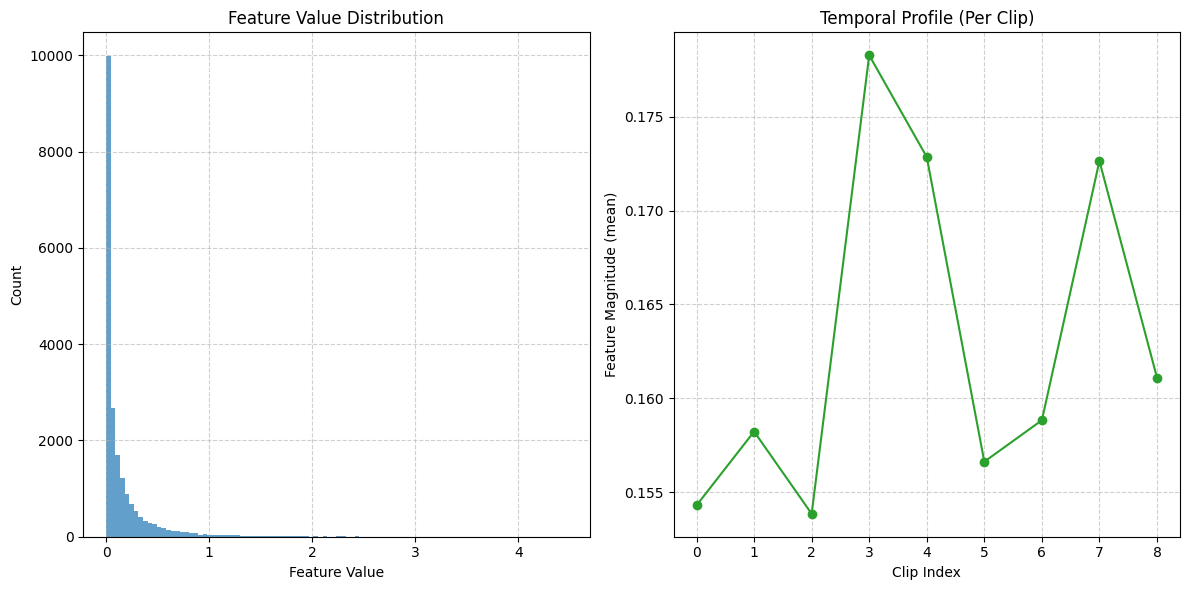

In [8]:
# slow-fast
visualize_features('/data1/yogesh/projects/feature_extraction/features/ILSVRC2015_train_00008004.npz')

Feature Analysis: ILSVRC2015_train_00008004.npz
├── Shape: (9, 512)
├── Dtype: float32
├── Min: -7.7420
├── Max: 1.6233
├── Mean: -0.0067
└── Std: 0.4714


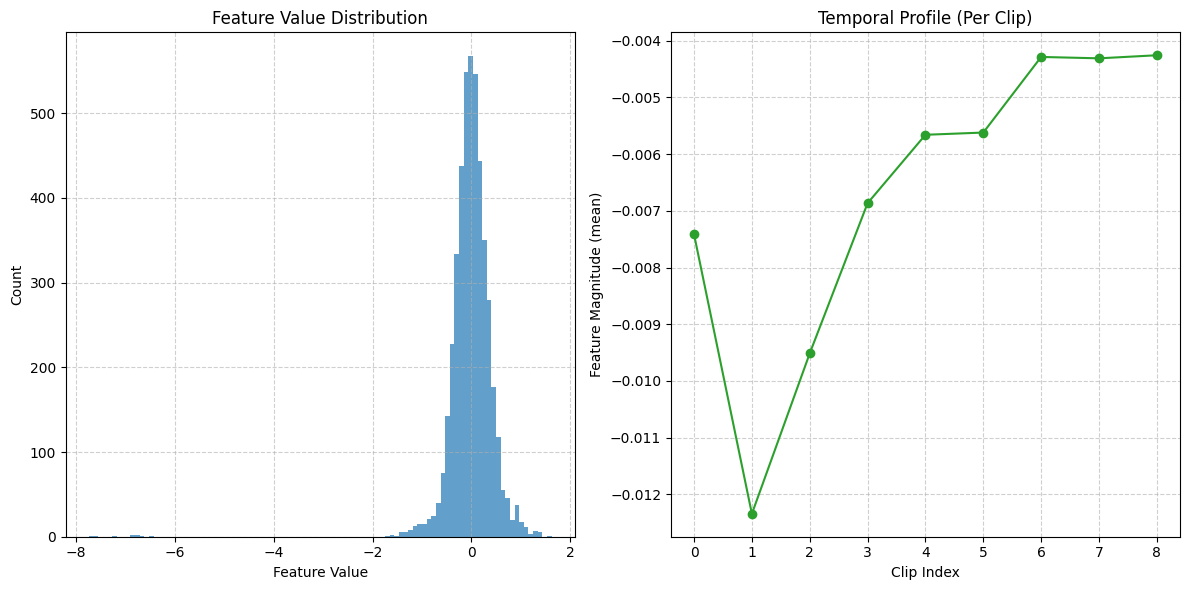

In [13]:
#clip
visualize_features('/data1/yogesh/projects/feature_extraction/features/ILSVRC2015_train_00008004.npz')